# Import the Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import boston_housing

# Load the Dataset

In [2]:
(X_train , y_train) , (X_test , y_test) = boston_housing.load_data()

In [3]:
print(f'Train shape : {X_train.shape}')
print(f'Train label shape : {y_train.shape}')

print(f'Test shape : {X_test.shape}')
print(f'Test label shape : {y_test.shape}')

Train shape : (404, 13)
Train label shape : (404,)
Test shape : (102, 13)
Test label shape : (102,)


In [4]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
set(y_train) # Continous

{5.0,
 6.3,
 7.0,
 7.2,
 7.5,
 8.3,
 8.4,
 8.5,
 8.7,
 8.8,
 9.6,
 10.2,
 10.4,
 10.5,
 10.8,
 10.9,
 11.0,
 11.3,
 11.5,
 11.7,
 11.8,
 11.9,
 12.1,
 12.3,
 12.5,
 12.6,
 12.7,
 12.8,
 13.1,
 13.2,
 13.3,
 13.4,
 13.5,
 13.6,
 13.8,
 13.9,
 14.0,
 14.1,
 14.2,
 14.3,
 14.4,
 14.5,
 14.6,
 14.8,
 14.9,
 15.0,
 15.1,
 15.2,
 15.3,
 15.6,
 15.7,
 16.0,
 16.1,
 16.2,
 16.3,
 16.4,
 16.5,
 16.6,
 16.7,
 16.8,
 17.0,
 17.1,
 17.2,
 17.3,
 17.4,
 17.5,
 17.7,
 17.8,
 17.9,
 18.0,
 18.1,
 18.2,
 18.3,
 18.4,
 18.5,
 18.7,
 18.8,
 18.9,
 19.0,
 19.1,
 19.2,
 19.3,
 19.4,
 19.5,
 19.6,
 19.7,
 19.8,
 19.9,
 20.0,
 20.1,
 20.2,
 20.3,
 20.4,
 20.5,
 20.6,
 20.7,
 20.8,
 21.0,
 21.1,
 21.2,
 21.4,
 21.6,
 21.7,
 21.8,
 21.9,
 22.0,
 22.1,
 22.2,
 22.3,
 22.4,
 22.5,
 22.6,
 22.7,
 22.8,
 22.9,
 23.0,
 23.1,
 23.2,
 23.3,
 23.4,
 23.5,
 23.6,
 23.7,
 23.8,
 23.9,
 24.0,
 24.1,
 24.3,
 24.4,
 24.5,
 24.6,
 24.7,
 24.8,
 25.0,
 25.1,
 25.2,
 25.3,
 26.2,
 26.4,
 26.5,
 26.6,
 27.1,
 27.5,
 27.9,
 28

In [6]:
# Its the regression task.

# Lets Show Some Examples

In [7]:
print("Some samples from data:")

for i in range(3):
    print("Features:", X_train[i])
    print("Target:", y_train[i])
    print()

Some samples from data:
Features: [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Target: 15.2

Features: [2.1770e-02 8.2500e+01 2.0300e+00 0.0000e+00 4.1500e-01 7.6100e+00
 1.5700e+01 6.2700e+00 2.0000e+00 3.4800e+02 1.4700e+01 3.9538e+02
 3.1100e+00]
Target: 42.3

Features: [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
 1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
 3.26000e+00]
Target: 50.0



# Normalize the Data

In [8]:
X_train_scaled = tf.keras.utils.normalize(X_train)
X_test_scaled = tf.keras.utils.normalize(X_test)

# Modelling

In [9]:
X_train.shape

(404, 13)

In [10]:
pd.Series(y_train).value_counts() # Cont.

50.0    13
21.7     6
23.1     6
19.4     6
20.6     6
        ..
13.2     1
42.3     1
8.7      1
14.2     1
25.2     1
Name: count, Length: 201, dtype: int64

# ANN Model

In [11]:
from tensorflow.keras.layers import Dense, InputLayer , Rescaling , Dropout , Flatten
from tensorflow.keras import Sequential

ann_model = Sequential([
    InputLayer(input_shape=(X_train_scaled.shape[1])),
    
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.1),
    
    Dense(1, activation= 'linear')
])

ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [12]:
ann_model.compile(loss = 'mean_squared_error' , optimizer= "adam" , metrics = ['mae'])

ann_model.fit(X_train_scaled, y_train, batch_size=32 , epochs = 12 , validation_split= 0.1)

Epoch 1/12
12/12 [==============================] - 1s 12ms/step - loss: 590.0006 - mae: 22.3744 - val_loss: 490.6062 - val_mae: 21.1633
Epoch 2/12
12/12 [==============================] - 0s 4ms/step - loss: 567.7249 - mae: 21.8619 - val_loss: 458.5301 - val_mae: 20.3931
Epoch 3/12
12/12 [==============================] - 0s 4ms/step - loss: 520.3214 - mae: 20.7597 - val_loss: 391.8425 - val_mae: 18.6922
Epoch 4/12
12/12 [==============================] - 0s 4ms/step - loss: 420.7578 - mae: 18.1512 - val_loss: 256.8483 - val_mae: 14.6588
Epoch 5/12
12/12 [==============================] - 0s 4ms/step - loss: 251.0766 - mae: 12.6690 - val_loss: 85.1363 - val_mae: 7.5273
Epoch 6/12
12/12 [==============================] - 0s 4ms/step - loss: 103.7922 - mae: 7.2357 - val_loss: 46.6022 - val_mae: 5.5343
Epoch 7/12
12/12 [==============================] - 0s 4ms/step - loss: 100.2058 - mae: 7.9799 - val_loss: 40.2917 - val_mae: 5.1524
Epoch 8/12
12/12 [==============================] - 0s 

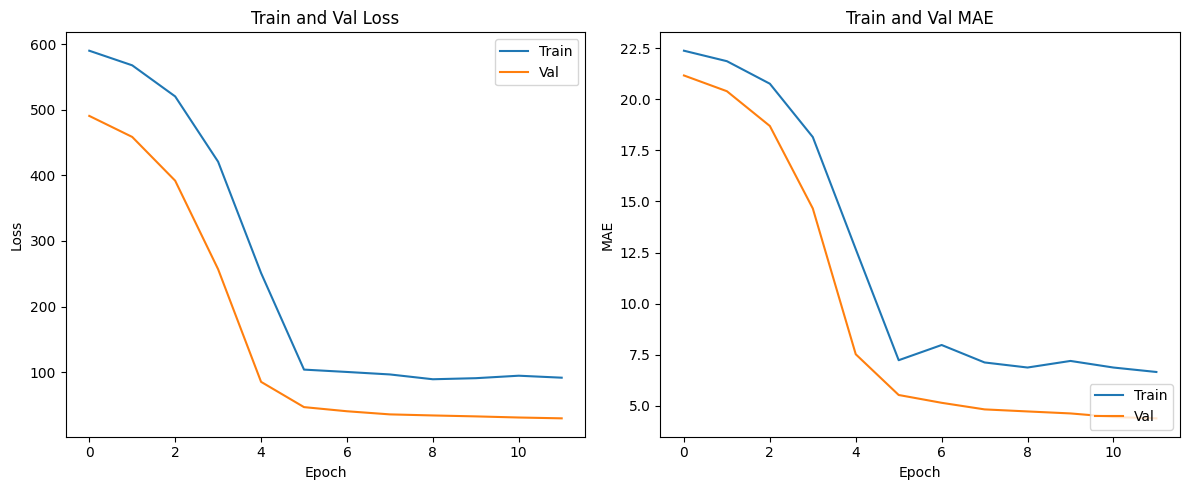

In [13]:
def visualize_model(model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


    ax1.plot(model.history.history['loss'])
    ax1.plot(model.history.history['val_loss'])
    ax1.set_title('Train and Val Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend(['Train', 'Val'], loc='upper right')


    ax2.plot(model.history.history['mae'])
    ax2.plot(model.history.history['val_mae'])
    ax2.set_title('Train and Val MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('MAE')
    ax2.legend(['Train', 'Val'], loc='lower right')


    plt.tight_layout()
    plt.show()
        
visualize_model(ann_model)

In [14]:
ann_model.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 69.2160 - mae: 5.9501


[69.21601104736328, 5.95012903213501]

In [15]:
# Done